<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/04/04_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
%%capture
!pip install seaborn

In [ ]:
# @title
import random

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

import scipy
import scipy.sparse
from scipy.optimize import curve_fit
import numba

from pynndescent import NNDescent

sns.set_theme()
random.seed(2)

## PCA

#### PCA 概述

principal component analysis (PCA: 主成分分析):
- 保持原本的資料模式, 透過座標軸轉換, 更好的去體現資料的 variability
- 新的座標軸 (principal component) 是根據資料的變異性來選擇的, 目的是找到最大程度反映資料 variance 的方向
- 可以簡化資料維度, 同時保留重要 (variance 大) 的信息

principal component (PC) 可以視為
- 最大化 variance
- 最小化近似 error (MSE)
    - 提供最接近資料的低維 linear surface
    - [2.2 The Objective Function](https://timroughgarden.org/s17/l/l7.pdf)

![][image1]

[image1]: <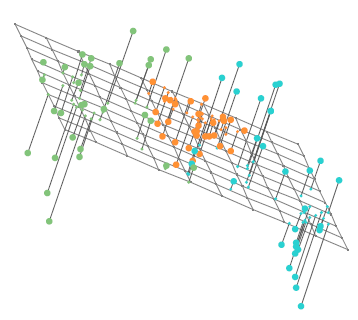>
[圖源](https://www.statlearning.com/)

#### PCA 原理

假設資料矩陣置中

$X_{p \times n}=\begin{bmatrix}
x_{11}-\bar{x}_1 & \cdots & x_{1n}-\bar{x}_1 \\
\vdots & \ddots & \vdots \\
x_{p1}-\bar{x}_p & \cdots & x_{pn}-\bar{x}_p
\end{bmatrix}$, $\bar{x}_i=\frac{1}{n}\sum_{j=1}^{n} x_{ij}$

$\because C_X=\frac{1}{n} XX^T$ 是 symmetrix

$\therefore C_X$ 為 orthogonally diagonalizable $\rightarrow C_X=PDP^T$
- $P$: orthogonal matrix
    - orthonormal column
    - $P^T=P^{-1}$
- $D$: diagonal

令 $Y=P^TX$

$\begin{aligned}
C_Y &= \frac{1}{n} YY^T \\
    &= \frac{1}{n} P^TXX^TP \\
    &= P^TC_XP \\
    &= P^TPDP^TP \hspace{1em} (由於 P^T=P^{-1}) \\
    &= D
\end{aligned}
$

#### PCA 特性

- 為座標軸轉換 (change of basis)
- 新座標軸 (principal component) 為原資料集 covariance matrix 的 eigenvector
- 轉換後的資料沿新座標軸的 variance 為原資料集 covariance matrix 的 eigenvalue
- principal component 按 variance 由大到小排列
- orthogonal change 不改變資料的 total variance
    - $\sum_{i=1}^{p} (C_{Y})_{ii}$ $=$ $\sum_{i=1}^{p} (C_{X})_{ii}$


第 $m$ 個 principal component 的 explained variance ratio:

$\frac{(C_Y)_{mm}}{\sum_{i=1}^{p} (C_Y)_{ii}}=\frac{D_{mm}}{tr(D)}$


在執行 PCA 之前, 通常會將每個 variable 的 standard deviation 縮放為 1